# KMR (Kandori-Mailath-Rob)モデルのシミュレーション

[ゲームの詳細](http://nbviewer.ipython.org/github/OyamaZemi/exercises2015/blob/master/ex04/KMR_notes.ipynb)

## モジュール類のインポート

In [51]:
#!/usr/bin/python
#-*- encoding: utf-8 -*-
"""
KMR (Kandori-Mailath-Rob) Model
Copyright (c) 2015 @myuuuuun
https://github.com/myuuuuun/KMR

Released under the MIT license.
"""
# エラー処理の類はまた今度
# 無駄が多い部分があるものの、それもまた今度

%matplotlib inline
import numpy as np
import scipy as sc
import quantecon as qe
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kmr import *

## 2×2対称行列ゲームの場合

利得表は

<table>
<tr>
<th></th>
  <th>行動1</th>
  <th>行動2</th>
  </tr>
  <tr>
  <th>行動1</th>
    <td>4, 4</td>
    <td>0, 3</td>
  </tr>
  <tr>
  <th>行動2</th>
    <td>3, 0</td>
    <td>2, 2</td>
  </tr>
</table>

で与えられる。  
以下、N=プレイヤーの総人数、ε=最適行動をとらない確率とする。

### 1. N=10, ε=0.1のとき

マルコフ連鎖の遷移行列は、

In [12]:
array = [[4, 0], [3, 2]]
kmr = KMR(array, 10, 0.1)

rst = ""
for v in kmr.transition_matrix:
    for j in v:
        rst += "{0:.3f} ".format(j)
    rst += "\n"
    
print(rst)

0.950 0.050 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.095 0.860 0.045 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.190 0.770 0.040 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.285 0.680 0.035 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.380 0.590 0.030 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.475 0.500 0.025 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.570 0.050 0.380 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.035 0.680 0.285 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.040 0.770 0.190 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.045 0.860 0.095 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.050 0.950 



※列: 遷移前の行動1をとるプレイヤー数, 行: 行動1をとるプレイヤー数

となる。

定常分布は、

In [52]:
state_players = kmr.state_players
stationary_distribution = kmr.compute_stationary_distribution()[0]
for p, d in zip(state_players, stationary_distribution):
    print("{0}: {1:.3f}".format(p, d))

[0, 10]: 0.597
[1, 9]: 0.314
[2, 8]: 0.074
[3, 7]: 0.010
[4, 6]: 0.001
[5, 5]: 0.000
[6, 4]: 0.000
[7, 3]: 0.000
[8, 2]: 0.000
[9, 1]: 0.001
[10, 0]: 0.002


※ \[行動1をとっている人数, 行動2をとっている人数\]: 確率

となる。パレート効率的でない方の純粋戦略ナッシュ均衡に収束しているのが面白いところ。

1000期でシミュレートしてみると、状態の遷移状況は、

In [48]:
simulated = kmr.from_stateindex_to_stateplayersnum(kmr.simulate(1000, 5, start_init=True))
print(simulated)

[[ 5  5]
 [ 5  5]
 [ 5  5]
 ..., 
 [ 0 10]
 [ 0 10]
 [ 0 10]]


となる。これをグラフにプロットしてみると、

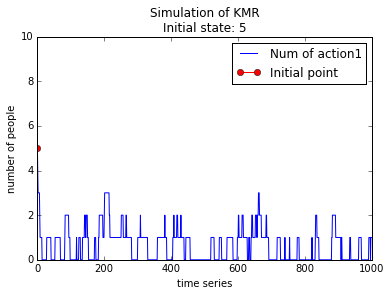

In [26]:
kmr.plot_simulation(1000, 5)

となり、おおむね定常分布に一致していることがわかる。

他の初期状態の場合でも試してみると、

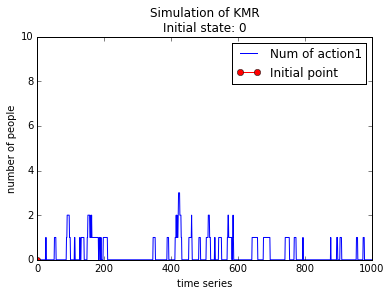

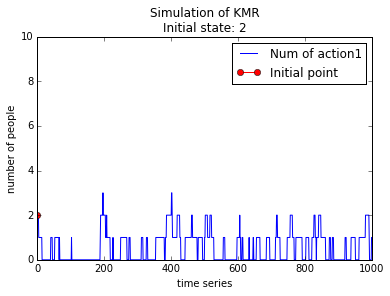

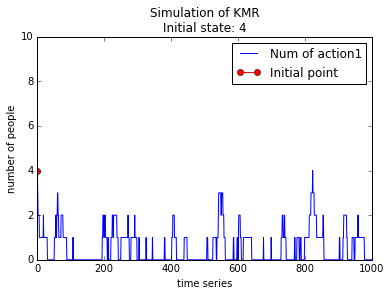

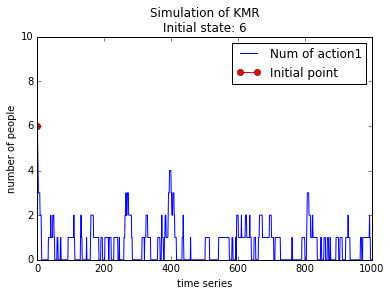

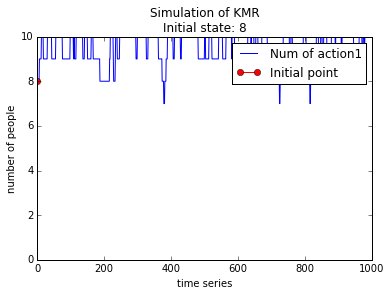

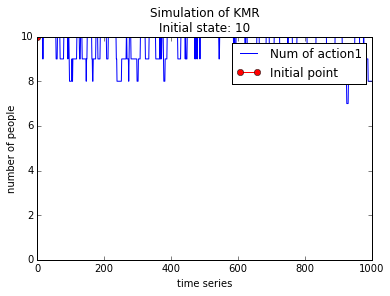

In [27]:
kmr.plot_simulation(1000, 0)
kmr.plot_simulation(1000, 2)
kmr.plot_simulation(1000, 4)
kmr.plot_simulation(1000, 6)
kmr.plot_simulation(1000, 8)
kmr.plot_simulation(1000, 10)

初期状態が0〜6の場合は定常分布通りになるが、初期状態が8や10だと（行動1, 行動1）のナッシュ均衡が実現しやすそう。

time seriesを1000期から増やしてみると、

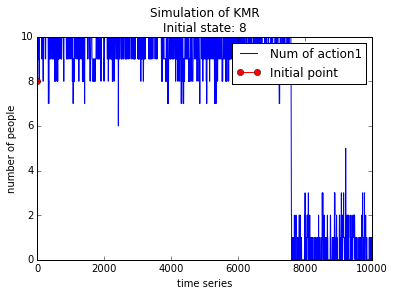

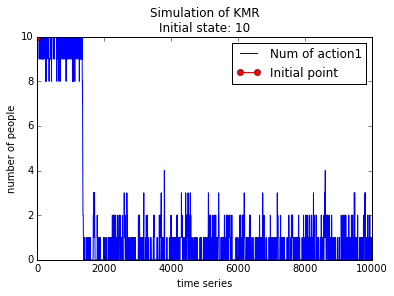

In [29]:
kmr.plot_simulation(10000, 8)
kmr.plot_simulation(10000, 10)

途中で偶然にも(行動2, 行動2)のナッシュ均衡の側に近づけば、それ以降はずっとそっちに張り付く。

### 2. N=10, ε= 0.2, 0.01のとき

εが大きかったり小さかったりすると、どういう状態推移をするだろうか。

In [35]:
array = [[4, 0], [3, 2]]
kmr2 = KMR(array, 10, 0.2)
kmr3 = KMR(array, 10, 0.01)

# ε=0.2の定常分布
rst = ""
for v in kmr2.transition_matrix:
    for j in v:
        rst += "{0:.3f} ".format(j)
    rst += "\n"
print("ε=0.2の定常分布")
print(rst)

# ε=0.01の定常分布
rst = ""
for v in kmr3.transition_matrix:
    for j in v:
        rst += "{0:.3f} ".format(j)
    rst += "\n"
print("\nε=0.01の定常分布")
print(rst)

ε=0.2の定常分布
0.900 0.100 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.090 0.820 0.090 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.180 0.740 0.080 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.270 0.660 0.070 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.360 0.580 0.060 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.450 0.500 0.050 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.540 0.100 0.360 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.070 0.660 0.270 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.080 0.740 0.180 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.090 0.820 0.090 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.100 0.900 


ε=0.01の定常分布
0.995 0.005 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.100 0.896 0.005 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.199 0.797 0.004 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.298 0.698 0.003 0.000 0

ε=0.2のときの状態推移をplot

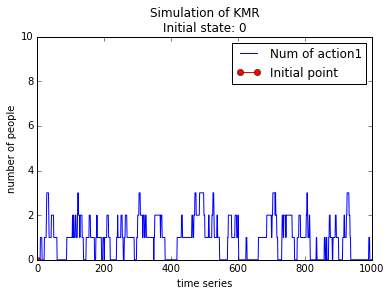

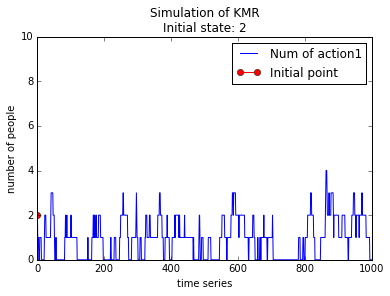

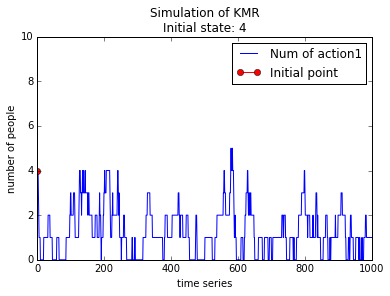

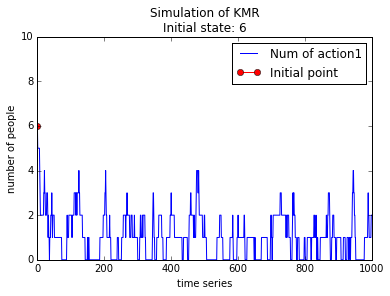

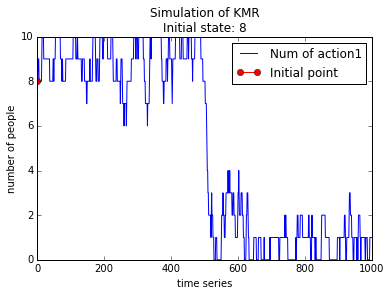

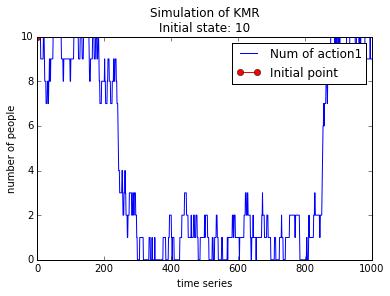

In [34]:
kmr2.plot_simulation(1000, 0)
kmr2.plot_simulation(1000, 2)
kmr2.plot_simulation(1000, 4)
kmr2.plot_simulation(1000, 6)
kmr2.plot_simulation(1000, 8)
kmr2.plot_simulation(1000, 10)

「実験」をする確率が上がると、2つの（純粋戦略）ナッシュ均衡をいったり来たりする

ε=0.01のときの状態推移をplot

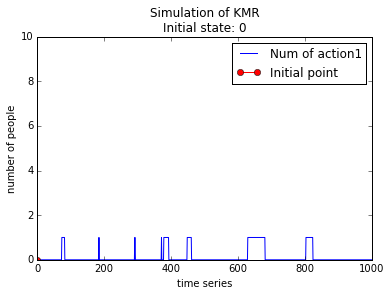

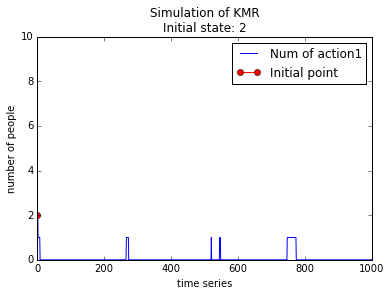

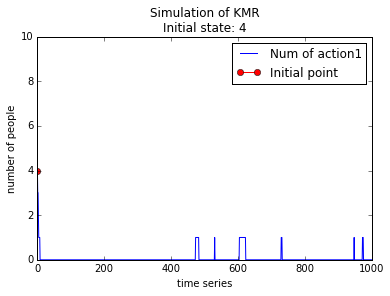

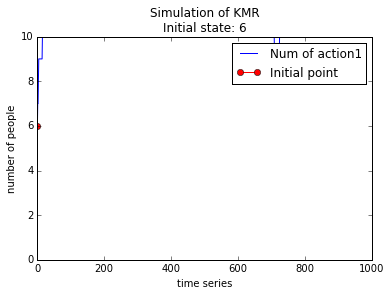

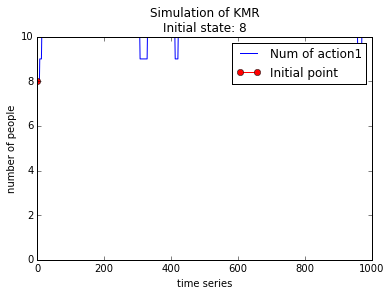

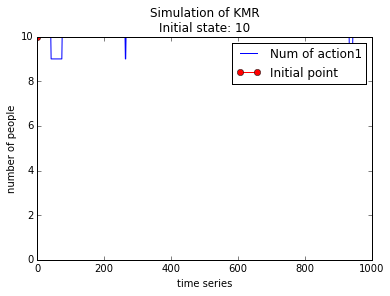

In [36]:
kmr3.plot_simulation(1000, 0)
kmr3.plot_simulation(1000, 2)
kmr3.plot_simulation(1000, 4)
kmr3.plot_simulation(1000, 6)
kmr3.plot_simulation(1000, 8)
kmr3.plot_simulation(1000, 10)

「実験」をする確率が下がると、1つの純粋戦略ナッシュ均衡に張り付いたら、離れづらい。

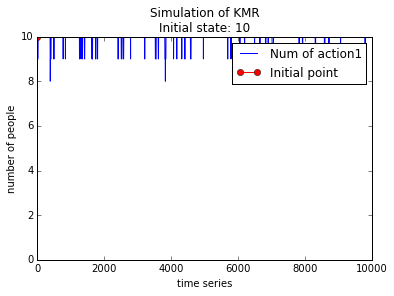

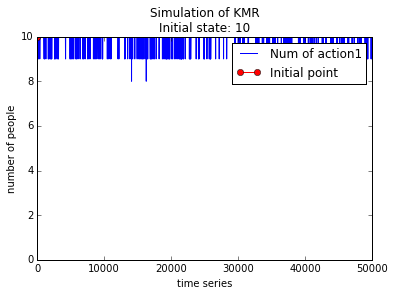

In [38]:
kmr3.plot_simulation(10000, 10)
kmr3.plot_simulation(50000, 10)

離れづらい。